# Fetching reviews of IRCTC App from Google Play Store

In [6]:
#Installing Google Play Scrapper
#Official documentation : https://pypi.org/project/google-play-scraper/

pip install google-play-scraper

  Using cached google_play_scraper-1.2.2-py3-none-any.whl (28 kB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
#Importing necessary modules
from google_play_scraper import app,Sort,reviews_all
import pandas as pd
import numpy as np
from google_play_scraper import Sort, reviews

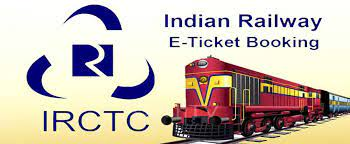

In [2]:
result, continuation_token = reviews(
    'cris.org.in.prs.ima', 
    lang='en', 
    country='us',
    count=10000,
    sort=Sort.NEWEST, 
)


In [3]:
#Assembling reviews into a pandas dataframe for better pipelining
df_review=pd.DataFrame(np.array(result),columns=['review'])
df_review=df_review.join(pd.DataFrame(df_review.pop('review').tolist()))

In [4]:
df_review.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,b06b4ad6-35c9-45df-aca4-66882aeef847,सशक्त गाँव समृद्ध भारत ClubKadakNath,https://play-lh.googleusercontent.com/a-/AFdZu...,Best site to book tickets for Indian Railways,5,0,None,2022-09-05 23:31:57,None,NaT
1,8c3fd539-c73b-48f6-8514-4044dcd33b22,suresh rathor,https://play-lh.googleusercontent.com/a-/AFdZu...,Good,5,0,None,2022-09-05 23:23:37,None,NaT
2,69bc906a-5bc5-4d37-aa4e-939c3e52fafd,Abhijit Dey,https://play-lh.googleusercontent.com/a-/AFdZu...,Good,5,0,4.1.27,2022-09-05 23:17:51,None,NaT
3,17088a44-9bc9-4ebd-9e39-e32909dbf2e0,muske praveen,https://play-lh.googleusercontent.com/a-/AFdZu...,👍,5,0,None,2022-09-05 23:13:02,None,NaT
4,53dc3306-a86a-4d91-9a32-c11a01e84989,Vijay Baranwal,https://play-lh.googleusercontent.com/a/AItbvm...,Very nice app,5,0,None,2022-09-05 23:11:33,None,NaT


# Data Preprocessing

In [5]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              10000 non-null  object        
 1   userName              10000 non-null  object        
 2   userImage             10000 non-null  object        
 3   content               10000 non-null  object        
 4   score                 10000 non-null  int64         
 5   thumbsUpCount         10000 non-null  int64         
 6   reviewCreatedVersion  8708 non-null   object        
 7   at                    10000 non-null  datetime64[ns]
 8   replyContent          229 non-null    object        
 9   repliedAt             229 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(6)
memory usage: 781.4+ KB


In [6]:
df_review.dtypes

reviewId                        object
userName                        object
userImage                       object
content                         object
score                            int64
thumbsUpCount                    int64
reviewCreatedVersion            object
at                      datetime64[ns]
replyContent                    object
repliedAt               datetime64[ns]
dtype: object

We need to work with reviews and their corresponding score..

In [7]:
features=df_review['content']
targets=df_review['score']

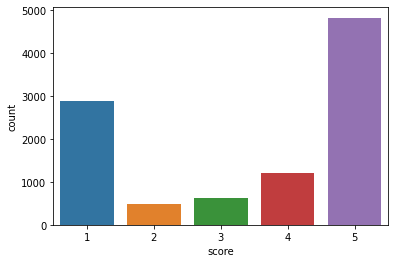

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data=df_review,x=df_review['score'])
plt.show()

As we can see, there isa clear class imbalance. However for the time being, let us work with this distribution only without any undersampling techniques. We should ensure looking at metrics other than accuracy for evaluating model performance!


# Binary Classification

Let us assume for the time being that reviews less than or equal to 2 are considered negative and reviews greater than or equal to 3 are considered positive.This  simplifes the classification problem into a binary one.

In [10]:
new_targets=[]
num_pos=0
num_neg=0
for rows in range(targets.shape[0]):
    temp_score=targets[rows]
    if temp_score>=3:
        new_targets.append(1)
        num_pos+=1
    else:
        new_targets.append(0)
        num_neg+=1
        

In [11]:
print('Number of positive reviews {}\nNumber of negative reviews {}'.format(num_pos,num_neg))

Number of positive reviews 6644
Number of negative reviews 3356


# Text Preprocessing

In [12]:
import nltk 
import re
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PROMIT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [14]:
corpus=[]
for i in range(0,len(features)):
    pat = r'[^a-zA-z0-9]'
    text=features[i]
    review=re.sub(pat,' ',text)
    review=review.lower()
    review=review.split()
    review=[ps.stem(word) for word in review if word not in stopwords.words('english')]
    review=' '.join(review)
    corpus.append(review)

# Bag of Words Model

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=3000,binary=True,ngram_range=(2,2))

In [16]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(features,new_targets,test_size=0.3,random_state=42)

In [17]:
# Transforming feature vectors into bag of words representations
X_train=cv.fit_transform(X_train) # Fitting on Train Dataset
X_test=cv.transform(X_test) # Transforming test dataset 

Models I would be implementing:

1.Multiomial Naive Bayes Classifier

2.Logistic Regression

3.Random Forest Classifier

4.K Nearest Neighbors

Then, model with best performance would be selected.

In [18]:
#Importing the four modles from Scikit Learn Library
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble  import RandomForestClassifier

In [19]:
class Train_Model:
    def __init__(self,X_train,Y_train,model):
        self.train_features=X_train
        self.train_targets=Y_train
        self.model=model
    def train(self):
        self.model.fit(X_train,Y_train)
        print('Training done...')

In [20]:
#Fitting the respective models on training dataset
sentiment_multi_naive_bayes=MultinomialNB()
sentiment_logreg=LogisticRegression()
sentiment_knn=KNeighborsClassifier()
sentiment_RFclassifier=RandomForestClassifier()
tm=Train_Model(X_train,Y_train,sentiment_multi_naive_bayes)
tm.train()
tm=Train_Model(X_train,Y_train,sentiment_logreg)
tm.train()
tm=Train_Model(X_train,Y_train,sentiment_knn)
tm.train()
tm=Train_Model(X_train,Y_train,sentiment_RFclassifier)
tm.train()


Training done...
Training done...
Training done...
Training done...


In [21]:
#Obtaining predictions on test dataset for each model
preds_sentiment_multi_naive_bayes=sentiment_multi_naive_bayes.predict(X_test)
preds_logreg=sentiment_logreg.predict(X_test)
preds_knn=sentiment_knn.predict(X_test)
preds_RFClassifier=sentiment_RFclassifier.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
acc_multi_naive=accuracy_score(Y_test,preds_sentiment_multi_naive_bayes)
acc_lgreg=accuracy_score(Y_test,preds_logreg)
acc_knn=accuracy_score(Y_test,preds_knn)
acc_RFClassifier=accuracy_score(Y_test,preds_RFClassifier)

In [23]:
print('Accuracy of MultiNomial Naive Bayes Classifier {:.2f}%\nAccuracy of Logistic Regression Classifier {:.2f}%\nAccuracy of KNN Classifier {:.2f}%\nAccuracy of Random Forest Classifier {:.2f}%'.format(100*acc_multi_naive,100*acc_lgreg,100*acc_knn,100*acc_RFClassifier))

Accuracy of MultiNomial Naive Bayes Classifier 84.70%
Accuracy of Logistic Regression Classifier 83.53%
Accuracy of KNN Classifier 80.20%
Accuracy of Random Forest Classifier 84.43%


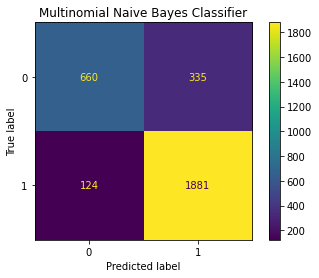

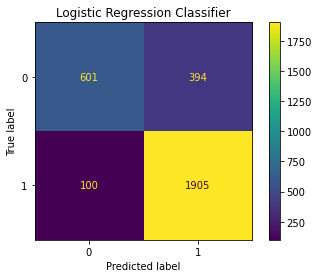

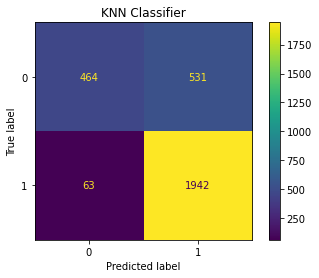

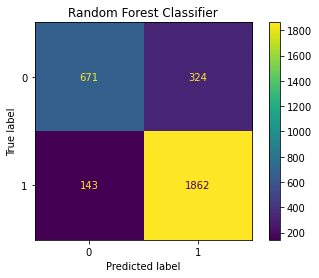

In [24]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
c1=confusion_matrix(Y_test,preds_sentiment_multi_naive_bayes)
disp=ConfusionMatrixDisplay(c1)
disp.plot()
plt.title('Multinomial Naive Bayes Classifier')
plt.show()
c2=confusion_matrix(Y_test,preds_logreg)
disp=ConfusionMatrixDisplay(c2)
disp.plot()
plt.title('Logistic Regression Classifier')
plt.show()
c3=confusion_matrix(Y_test,preds_knn)
disp=ConfusionMatrixDisplay(c3)
disp.plot()
plt.title('KNN Classifier')
plt.show()
c4=confusion_matrix(Y_test,preds_RFClassifier)
disp=ConfusionMatrixDisplay(c4)
disp.plot()
plt.title('Random Forest Classifier')
plt.show()

From the Confusion Matrices, we can conclude that **Multinomial Naive Bayes** Classifier is performing best.

# MultiLabel Classification from Bag of Words

In [25]:
X_train,X_test,Y_train,Y_test=train_test_split(features,targets,test_size=0.3,random_state=42)

In [26]:
# Transforming feature vectors into bag of words representations
X_train=cv.fit_transform(X_train) # Fitting on Train Dataset
X_test=cv.transform(X_test) # Transforming test dataset 

In [27]:
#Fitting the respective models on training dataset
sentiment_multi_naive_bayes=MultinomialNB()
sentiment_knn=KNeighborsClassifier()
sentiment_RFclassifier=RandomForestClassifier()
tm=Train_Model(X_train,Y_train,sentiment_multi_naive_bayes)
tm.train()
tm=Train_Model(X_train,Y_train,sentiment_knn)
tm.train()
tm=Train_Model(X_train,Y_train,sentiment_RFclassifier)
tm.train()


Training done...
Training done...
Training done...


In [28]:
#Obtaining predictions on test dataset for each model
preds_sentiment_multi_naive_bayes=sentiment_multi_naive_bayes.predict(X_test)
preds_knn=sentiment_knn.predict(X_test)
preds_RFClassifier=sentiment_RFclassifier.predict(X_test)

In [29]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
acc_multi_naive=accuracy_score(Y_test,preds_sentiment_multi_naive_bayes)
acc_knn=accuracy_score(Y_test,preds_knn)
acc_RFClassifier=accuracy_score(Y_test,preds_RFClassifier)

In [30]:
print('Accuracy of MultiNomial Naive Bayes Classifier {:.2f}%\nAccuracy of KNN Classifier {:.2f}%\nAccuracy of Random Forest Classifier {:.2f}%'.format(100*acc_multi_naive,100*acc_knn,100*acc_RFClassifier))

Accuracy of MultiNomial Naive Bayes Classifier 68.47%
Accuracy of KNN Classifier 41.47%
Accuracy of Random Forest Classifier 66.67%


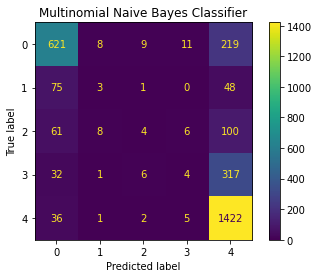

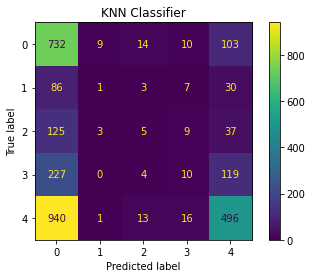

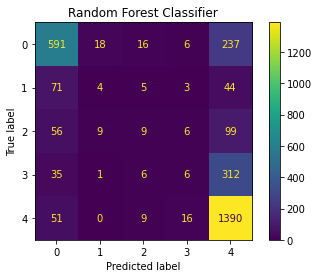

In [31]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
c1=confusion_matrix(Y_test,preds_sentiment_multi_naive_bayes)
disp=ConfusionMatrixDisplay(c1)
disp.plot()
plt.title('Multinomial Naive Bayes Classifier')
plt.show()
c3=confusion_matrix(Y_test,preds_knn)
disp=ConfusionMatrixDisplay(c3)
disp.plot()
plt.title('KNN Classifier')
plt.show()
c4=confusion_matrix(Y_test,preds_RFClassifier)
disp=ConfusionMatrixDisplay(c4)
disp.plot()
plt.title('Random Forest Classifier')
plt.show()

Once again, Multinomial Naive Bayes Classifier is performing the best among all models... However, the overall performance is poor , hence its not ideal to use multiclass classification for this problem.

# TF-IDF Model

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
tv=TfidfVectorizer(max_features=1000)

# Binary Classification

In [56]:
X_train,X_test,Y_train,Y_test=train_test_split(features,new_targets,test_size=0.3)
X_train=tv.fit_transform(X_train)
X_test=tv.transform(X_test)

In [57]:
#Fitting the respective models on training dataset
sentiment_multi_naive_bayes=MultinomialNB()
sentiment_logreg=LogisticRegression()
sentiment_knn=KNeighborsClassifier()
sentiment_RFclassifier=RandomForestClassifier()
tm=Train_Model(X_train,Y_train,sentiment_multi_naive_bayes)
tm.train()
tm=Train_Model(X_train,Y_train,sentiment_logreg)
tm.train()
tm=Train_Model(X_train,Y_train,sentiment_knn)
tm.train()
tm=Train_Model(X_train,Y_train,sentiment_RFclassifier)
tm.train()


Training done...
Training done...
Training done...
Training done...


In [58]:
#Obtaining predictions on test dataset for each model
preds_sentiment_multi_naive_bayes=sentiment_multi_naive_bayes.predict(X_test)
preds_logreg=sentiment_logreg.predict(X_test)
preds_knn=sentiment_knn.predict(X_test)
preds_RFClassifier=sentiment_RFclassifier.predict(X_test)

In [59]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
acc_multi_naive=accuracy_score(Y_test,preds_sentiment_multi_naive_bayes)
acc_lgreg=accuracy_score(Y_test,preds_logreg)
acc_knn=accuracy_score(Y_test,preds_knn)
acc_RFClassifier=accuracy_score(Y_test,preds_RFClassifier)

In [60]:
print('Accuracy of MultiNomial Naive Bayes Classifier {:.2f}%\nAccuracy of Logistic Regression Classifier {:.2f}%\nAccuracy of KNN Classifier {:.2f}%\nAccuracy of Random Forest Classifier {:.2f}%'.format(100*acc_multi_naive,100*acc_lgreg,100*acc_knn,100*acc_RFClassifier))

Accuracy of MultiNomial Naive Bayes Classifier 87.40%
Accuracy of Logistic Regression Classifier 88.60%
Accuracy of KNN Classifier 70.97%
Accuracy of Random Forest Classifier 88.47%


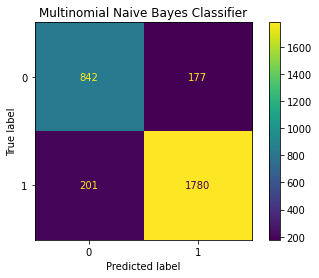

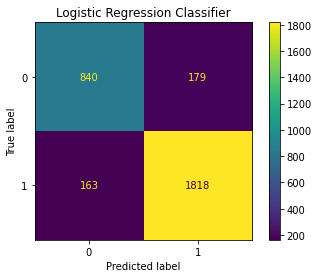

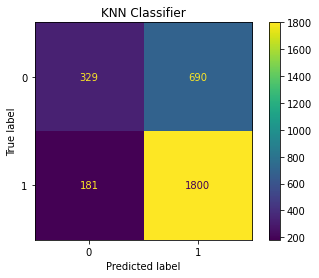

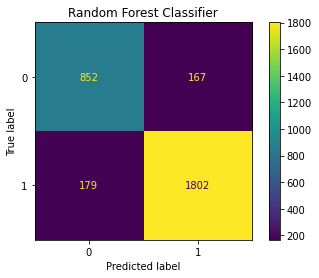

In [61]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
c1=confusion_matrix(Y_test,preds_sentiment_multi_naive_bayes)
disp=ConfusionMatrixDisplay(c1)
disp.plot()
plt.title('Multinomial Naive Bayes Classifier')
plt.show()
c2=confusion_matrix(Y_test,preds_logreg)
disp=ConfusionMatrixDisplay(c2)
disp.plot()
plt.title('Logistic Regression Classifier')
plt.show()
c3=confusion_matrix(Y_test,preds_knn)
disp=ConfusionMatrixDisplay(c3)
disp.plot()
plt.title('KNN Classifier')
plt.show()
c4=confusion_matrix(Y_test,preds_RFClassifier)
disp=ConfusionMatrixDisplay(c4)
disp.plot()
plt.title('Random Forest Classifier')
plt.show()

From the confusion matrices, it is clear that Logistic Regression Classifier , Random Forest Classifier as well as Multinomial Naive Bayes classifier are performing very well. We can decide the best model by considering the f1-score.

# Using LSTMs and Word Embeddings

In [43]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
# Tokenizing ( Basically label encoding top 4000 unique words from the corpus to feed into the Embedding Layer)
num_words =4000
tk = Tokenizer(oov_token='UNK', num_words=num_words+1)
tk.fit_on_texts(corpus)

In [50]:
vocabulary=len(tk.word_index)

In [45]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
sentence_len=500
embedded_doc=pad_sequences(
    tk.texts_to_sequences(corpus),
    maxlen=sentence_len,
    padding="pre"
)

# Binary Classification

In [46]:
new_targets=np.array(new_targets)

In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(embedded_doc,new_targets,random_state=42,test_size=0.3)
print("Training samples : {}\nTesting Samples : {}".format(len(X_train),len(X_test)))

Training samples : 7000
Testing Samples : 3000


In [51]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Input,LSTM,Dense,GlobalMaxPooling1D,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
input_shape=X_train.shape[1]
i=Input(shape=(input_shape,))
x=Embedding(vocabulary+1,50)(i)
x=LSTM(100,return_sequences=False)(x)
x=Flatten()(x)
x=Dense(512,activation='relu')(x)
x=Dense(256,activation='relu')(x)
x=Dense(128,activation='relu')(x)
x=Dense(64,activation='relu')(x)
x=Dense(32,activation='relu')(x)
x=Dense(1,activation='sigmoid')(x)
model=Model(i,x)
print(model.summary())

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 500)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 500, 50)           227750    
_________________________________________________________________
lstm (LSTM)                  (None, 100)               60400     
_________________________________________________________________
flatten (Flatten)            (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               51712     
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)              

In [52]:
#Compiling the model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])

In [53]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
history=model.fit(X_train,Y_train,epochs=100,validation_split=0.1,callbacks=[es])

Epoch 1/100
197/197 [==============================] - 41s 207ms/step - loss: 0.4022 - acc: 0.8262 - val_loss: 0.3487 - val_acc: 0.8571
Epoch 2/100
197/197 [==============================] - 40s 204ms/step - loss: 0.2921 - acc: 0.8948 - val_loss: 0.3202 - val_acc: 0.8843
Epoch 3/100
197/197 [==============================] - 37s 190ms/step - loss: 0.2649 - acc: 0.9043 - val_loss: 0.3306 - val_acc: 0.8771
Epoch 00003: early stopping


In [54]:
# Model Evaluation
preds_LSTM_binary=model.predict(X_test)
preds_LSTM_binary[preds_LSTM_binary>=0.5]=1
preds_LSTM_binary[preds_LSTM_binary<0.5]=0

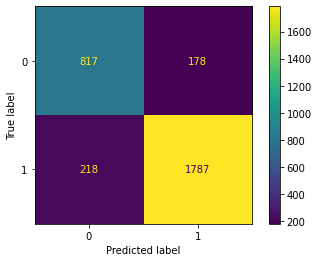

In [55]:
c3=confusion_matrix(Y_test,preds_LSTM_binary)
disp=ConfusionMatrixDisplay(c3)
disp.plot()
plt.show()

# Multiclass Classification

In [62]:
targets_encoded=[item-1 for item in targets]
targets_encoded=np.array(targets_encoded)

In [63]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(embedded_doc,targets_encoded,random_state=42,test_size=0.3)
print("Training samples : {}\nTesting Samples : {}".format(len(X_train),len(X_test)))

Training samples : 7000
Testing Samples : 3000


In [64]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Input,LSTM,Dense,GlobalMaxPooling1D,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
input_shape=X_train.shape[1]
i=Input(shape=(input_shape,))
x=Embedding(vocabulary+1,50)(i)
x=LSTM(100,return_sequences=False)(x)
x=Flatten()(x)
x=Dense(512,activation='relu')(x)
x=Dense(256,activation='relu')(x)
x=Dense(128,activation='relu')(x)
x=Dense(64,activation='relu')(x)
x=Dense(32,activation='relu')(x)
x=Dense(5,activation='sigmoid')(x)
model_multi=Model(i,x)
print(model_multi.summary())

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 500)]             0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 500, 50)           227750    
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               60400     
_________________________________________________________________
flatten_1 (Flatten)          (None, 100)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               51712     
_________________________________________________________________
dense_7 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_8 (Dense)              (None, 128)              

In [133]:
#Compiling the model
model_multi.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])

In [134]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
history=model_multi.fit(X_train,Y_train,epochs=100,validation_split=0.1,callbacks=[es])

Epoch 1/100
197/197 [==============================] - 67s 340ms/step - loss: 1.0378 - acc: 0.6452 - val_loss: 0.9916 - val_acc: 0.6486
Epoch 2/100
197/197 [==============================] - 55s 281ms/step - loss: 0.8630 - acc: 0.7084 - val_loss: 0.9933 - val_acc: 0.6571
Epoch 00002: early stopping


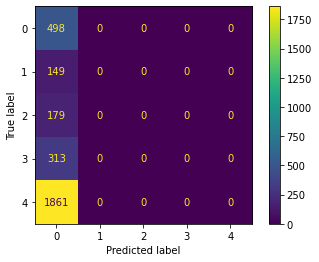

In [135]:
# Model Evaluation
preds_LSTM_multi=model.predict(X_test)
final_preds_multi=[np.argmax(item) for item in preds_LSTM_multi]
c3=confusion_matrix(Y_test,final_preds_multi)
disp=ConfusionMatrixDisplay(c3)
disp.plot()
plt.show()

Extremely Poor Performing Model.. .Not Learning ...

***Conclusion***

After testing with binary and multi class classification with various models, it is to be concluded that classical models are performing great as well as LSTM for binary classification.However, I proceeded with LSTMs for live predictions. Any review with less than equal to 2 score is regarded as negative or 0 and anything above that is treated as positive or 1. In the next notebook , I  have trained the same LSTM models and demonstrated some predictions illustratively.